In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.externals import joblib
import warnings
warnings.filterwarnings("ignore")


In [42]:
train = pd.read_csv("human activity-train.csv")
test = pd.read_csv("human activity-test.csv")

In [43]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [44]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [45]:
train.isnull().values.any()

False

In [46]:
test.isnull().values.any()

False

In [47]:
train.drop('subject', axis =1, inplace=True)
test.drop('subject', axis =1, inplace=True)

In [48]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [49]:
columns=test.columns.tolist()

In [50]:
train.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
                                         ...   
angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
Length: 562, dtype: object>

In [51]:
test.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
                                         ...   
angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
Length: 562, dtype: object>

In [52]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


In [53]:
test.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,0.130236,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.231018,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-0.785543,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.008433,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,0.142676,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,0.288320,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113


In [54]:
train.dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
                                         ...   
angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
Length: 562, dtype: object

In [55]:
test.dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
                                         ...   
angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
Length: 562, dtype: object

In [56]:
train.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [57]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in [train, test]:
    x['Activity'] = le.fit_transform(x.Activity)

In [58]:
train.Activity.sample(5)

6661    1
2971    0
4696    2
152     5
4781    0
Name: Activity, dtype: int32

In [59]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,2
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,2
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,2
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,2
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,2


In [60]:
feature_cols = train.columns[: -1]  

correlated_values = train[feature_cols].corr()


correlated_values = (correlated_values.stack().to_frame().reset_index()
                    .rename(columns={'level_0': 'Feature_1', 'level_1': 'Feature_2', 0:'Correlations'}))
correlated_values.head

<bound method NDFrame.head of                    Feature_1                             Feature_2  \
0          tBodyAcc-mean()-X                     tBodyAcc-mean()-X   
1          tBodyAcc-mean()-X                     tBodyAcc-mean()-Y   
2          tBodyAcc-mean()-X                     tBodyAcc-mean()-Z   
3          tBodyAcc-mean()-X                      tBodyAcc-std()-X   
4          tBodyAcc-mean()-X                      tBodyAcc-std()-Y   
...                      ...                                   ...   
314716  angle(Z,gravityMean)      angle(tBodyGyroMean,gravityMean)   
314717  angle(Z,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)   
314718  angle(Z,gravityMean)                  angle(X,gravityMean)   
314719  angle(Z,gravityMean)                  angle(Y,gravityMean)   
314720  angle(Z,gravityMean)                  angle(Z,gravityMean)   

        Correlations  
0           1.000000  
1           0.148061  
2          -0.256952  
3           0.000619  
4          -0.

In [61]:
correlated_values['abs_correlation'] = correlated_values.Correlations.abs()
correlated_values.head()

,Feature_1,Feature_2,Correlations,abs_correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-X,1.000000,1.000000
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.148061,0.148061
2,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.256952,0.256952
3,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.000619,0.000619
4,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.021903,0.021903


In [62]:
train_fields = correlated_values.sort_values('Correlations', ascending = False).query('abs_correlation>0.8')
train_fields.sample(5)

,Feature_1,Feature_2,Correlations,abs_correlation
241796,fBodyGyro-mad()-Z,tBodyAcc-std()-Z,0.915290,0.915290
7014,tBodyAcc-min()-X,fBodyAcc-energy()-Y,-0.895082,0.895082
71422,tBodyGyro-mad()-Y,tBodyGyroJerk-sma(),0.901144,0.901144
103101,tBodyGyroJerk-entropy()-Y,fBodyGyro-sma(),0.883986,0.883986
251047,fBodyGyro-entropy()-Z,fBodyAcc-sma(),0.941716,0.941716


In [63]:
split_data = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 42)
train_idx, val_idx = next(split_data.split(train[feature_cols], train.Activity))

#creating the dataframes

x_train = train.loc[train_idx, feature_cols]
y_train = train.loc[train_idx, 'Activity']

x_val = train.loc[val_idx, feature_cols]
y_val = train.loc[val_idx, 'Activity']

In [64]:
y_train.value_counts(normalize = True)

0    0.191411
2    0.186941
1    0.174893
3    0.166731
5    0.145939
4    0.134085
Name: Activity, dtype: float64

In [65]:
y_val.value_counts(normalize = True)

0    0.191296
2    0.186763
1    0.174977
3    0.166818
5    0.145966
4    0.134180
Name: Activity, dtype: float64

In [66]:
lr = LogisticRegression()
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2')
rf = RandomForestClassifier(n_estimators = 10)

lr = lr.fit(x_train, y_train)

rf = rf.fit(x_train, y_train)

lr_l2 = lr_l2.fit(x_train, y_train)

In [67]:
y_predict = list()
y_proba = list()

labels = ['lr', 'lr_l2', 'rf']
models = [lr, lr_l2, rf]

for lab, mod in zip(labels, models):
    y_predict.append(pd.Series(mod.predict(x_val), name = lab))
    y_proba.append(pd.Series(mod.predict_proba(x_val).max(axis=1), name = lab))
    #.max(axis = 1) for a 1 dimensional dataframe

y_predict = pd.concat(y_predict, axis = 1)
y_proba = pd.concat(y_proba, axis = 1)

y_predict.head()

,lr,lr_l2,rf
0,0,0,0
1,5,5,5
2,1,1,1
3,0,0,0
4,3,3,3


In [68]:
y_proba.head(10)

,lr,lr_l2,rf
0,0.997094,0.998343,1.0
1,0.992245,0.996829,0.9
2,0.994266,0.999096,1.0
3,0.999999,1.000000,1.0
4,0.985674,0.996003,1.0
5,0.974749,0.991036,0.8
6,0.999968,0.999998,1.0
7,0.999727,0.999953,1.0
8,0.954457,0.956412,0.9
9,0.999789,0.999955,1.0


In [69]:
metrics = list()
confusion_m = dict()

for lab in labels:
    precision, recall, f_score, _ = error_metric(y_val, y_predict[lab], average = 'weighted')
    
    accuracy = accuracy_score(y_val, y_predict[lab])
    
    confusion_m[lab] = confusion_matrix(y_val, y_predict[lab])
    
    metrics.append(pd.Series({'Precision': precision, 'Recall': recall,
                            'F_score': f_score, 'Accuracy': accuracy}, name = lab))
    
metrics= pd.concat(metrics, axis =1) 

In [70]:
metrics

,lr,lr_l2,rf
Precision,0.984601,0.985495,0.974672
Recall,0.984587,0.985494,0.974615
F_score,0.984585,0.985493,0.974618
Accuracy,0.984587,0.985494,0.974615


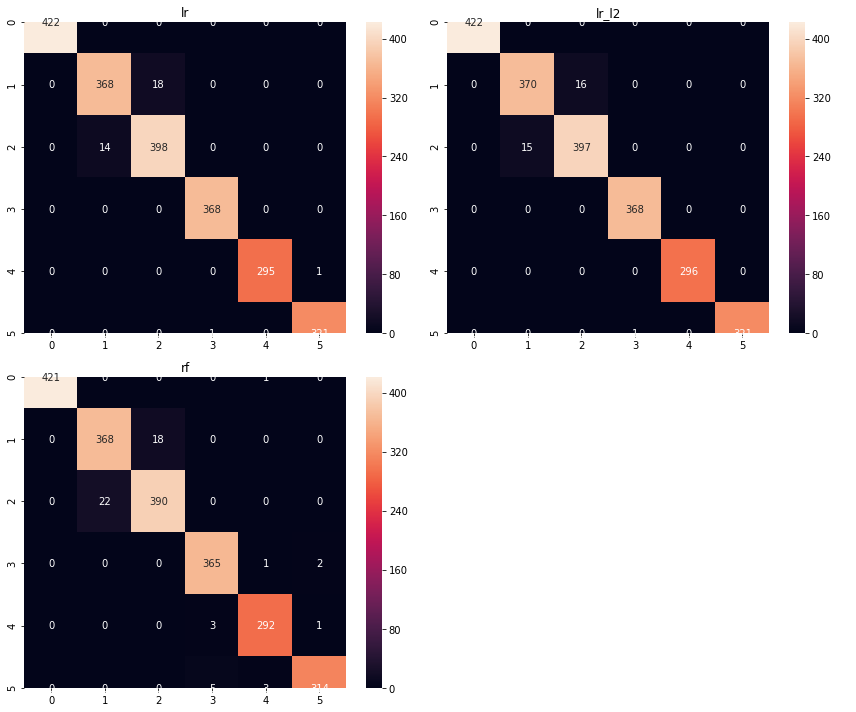

In [71]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], labels):
    sns.heatmap(confusion_m[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()